<span style="font-size:42px; "><strong>Thickness calculation from laser signal </strong></span>

<hr>

This notebook is for fitting a sinusoidal function to data for the measurement of the laser signal against time.


# Imports

We'll start by making the usual imports and other setups.

Remember to run this cell before any of the subsequent cells.

This will load the necessary packages (matplotlib.pyplot, numpy) needed to import, manipulate and plot the data

When plotting data, it is useful to toggle between showing the graph in a pop-up window, where you can zoom and read values, or in line in the notebook using:

%matplotlib qt

or

%matplotlib inline

Change this line in the following cell depending on the type of plot you prefer (refer to the InteractivePlotting notebook from Skills week 19 for more information on using these directives).

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# File handling and data inspection

The laser signal data should be saves as a .csv file containing two columns of comma-separated values

column 1 = time (s)

column 2 = laser signal (mV)

If there are any headers, these can be ignored by changing the value in 'skiprows=0'

Since the file structure is very simple we can use numpy to read from the file - we don't need Pandas dataframes. We will also use numpy to carry out the necessary mathematical functions on the data (e.g. apply a multiplier to scale the data or offset the data vertically to correct for a non-zero baseline).

To inspect the data, plots will be generated using matplotlib.

The fitting is carried out using curve_fit from the scipy.optimize package.

First load the data file by entering the filename below:


In [356]:
date = "2021_05_13"
spl = "ASW"
XP = "XP_1-1"
#T_Dep = ""


filename="D:\DATA-RAW\PAC\{}/{}/laser-diode_{}.csv".format(XP,date,date)

## Import

In [357]:
#function to import data, skips first 0 rows containing header information and outputs x and y data arrays
def importdata(filename):
    x, y = np.genfromtxt(filename, delimiter = ',', 
                        dtype = float, usecols = (0,1), unpack = True, skip_header = 1)
    return x, y

x, y = importdata(filename)     #extracts the x, y data from the data file

In [358]:
x

array([   0.,   30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,
        270.,  300.,  330.,  360.,  390.,  420.,  450.,  480.,  510.,
        540.,  570.,  600.,  630.,  660.,  690.,  720.,  750.,  780.,
        810.,  840.,  870.,  900.,  930.,  960.,  990., 1020., 1050.,
       1080., 1110., 1140., 1170., 1200.])

In [359]:
y


array([324.5, 323. , 321.5, 319.5, 318.3, 319. , 320.6, 322.1, 323.1,
       323.7, 323.7, 323.2, 322.1, 320.9, 319.2,   nan, 317. , 318.2,
       320.1, 321.8, 322.6, 323.2, 323.3, 323. , 322.1, 320.6, 318.8,
       317. , 316.8, 318.2, 320.1, 321.7, 322.5, 322.9, 323. , 322.5,
       321.6, 320.2, 318.3, 316.6, 316.3])

## Sanity check

### Nans value ?

In [360]:
date_thick = pd.read_csv("D:\DATA-RAW\PAC\{}/{}/laser-diode_{}.csv".format(XP,date,date))

In [361]:
date_thick.head(60)

,time/s,voltage/mV
0,0,324.5
1,30,323.0
2,60,321.5
3,90,319.5
4,120,318.3
5,150,319.0
6,180,320.6
7,210,322.1
8,240,323.1
9,270,323.7


 $\color{red}{\text{If Nan values in column 2, uncomment the 2 lines below }}$

In [362]:
#date_thick_clean = date_thick.dropna()

In [363]:
#date_thick_clean.to_csv("D:\DATA-RAW\PAC\{}/{}/laser-diode_{}.csv".format(XP,date,date), index=False)

We overwright the Raw laser diode data, but a copy of the original file must have been done prior to running this notebook and save as laser-diode_(date)_full.xls

After supressing the nan values we need to reopen the file (call importdata function)

In [364]:
#x, y = importdata(filename)

In some cases the signal may appear negative deepenting on the polarity of the connections to the laser diode. A simple way to fix this is with the following code

In [365]:
#checks for negative signal and makes it positive
if np.any(y < 0):
    y = -1*y

# 2 Fitting

The sinusoidal signal takes the form
$$y = y_0 + A sin(\frac{2\pi}{w}(x-x_c))$$

where $y_0$ is the vertical offset, $A$ is the amplitude, $x_c$ is the horizontal offset and $w$ is the period (i.e. $2\pi/w$ is the frequency)

We define the sine function 'sinfit(x, *p)' for the fit with some initial guesses, which can be edited accordingly.



## Function

In [366]:
#sin function used y0 + A*sin(2pi(x-xc)/w)
#with y0=y-offset, A=amplitude, xc=x-offset/phase, w=period 
def sinfit(x,*p):
    y0, A, xc, w = p
    return A*np.sin(2*np.pi*(x-xc)/w)+y0


## Guess 1

In [367]:

#Guess values

guess =[330, 4, 0, 400]
popt =[324, 4, 0, 400]


#fits the funtion and returns the parameters of the fit poppt[as many guesses as you have]
popt, pcov = curve_fit(sinfit, x, y, p0=guess, maxfev=10000, absolute_sigma=True)

#chi squared calculation
chi_squared = np.sum(((y-sinfit(x,*popt))**2)/(sinfit(x,*popt)) )
perr = np.sqrt(np.diag(pcov))

## Plot 1

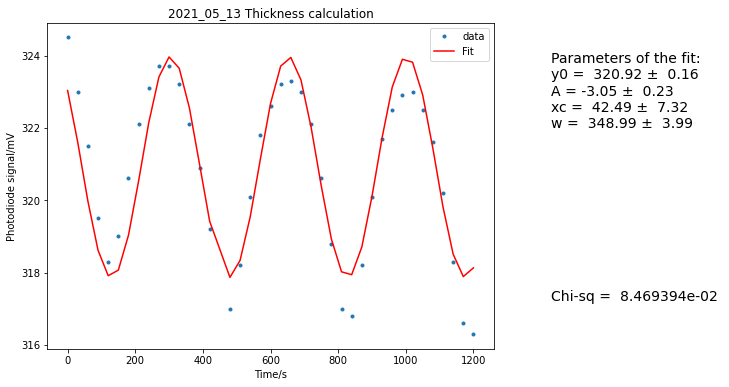

Chi-sq =  8.469394e-02 

Parameters of the fit:
y0 =  320.92 ±  0.16
A = -3.05 ±  0.23
xc =  42.49 ±  7.32
w =  348.99 ±  3.99



In [368]:
fig= plt.figure(figsize=(8,6))


t1 = str(f"Chi-sq = {chi_squared: 2e} \n")

t2 = str(f"Parameters of the fit:\n\
y0 = {popt[0]: .2f} \u00B1 {perr[0]: .2f}\n\
A = {popt[1]: .2f} \u00B1 {perr[1]: .2f}\n\
xc = {popt[2]: .2f} \u00B1 {perr[2]: .2f}\n\
w = {popt[3]: .2f} \u00B1 {perr[3]: .2f}\n")

#plots:
plt.plot(x, y, '.', label='data' )
plt.plot(x, sinfit(x,*popt),'r-', label='Fit')
plt.title('{0} Thickness calculation'.format(date))
plt.xlabel('Time/s')
plt.ylabel(r'Photodiode signal/mV')
plt.legend()
plt.text(1, 0.2, t1, fontsize=14, transform=plt.gcf().transFigure)
plt.text(1, 0.6, t2, fontsize=14, transform=plt.gcf().transFigure)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/Thickness-calc_{}_1.png'.format(XP, date, date), bbox_inches="tight")


plt.show()

#print calculated chi suqared
t1 = print(f"Chi-sq = {chi_squared: 2e} \n")

#print parameters of the fit
t2 = print(f"Parameters of the fit:\n\
y0 = {popt[0]: .2f} \u00B1 {perr[0]: .2f}\n\
A = {popt[1]: .2f} \u00B1 {perr[1]: .2f}\n\
xc = {popt[2]: .2f} \u00B1 {perr[2]: .2f}\n\
w = {popt[3]: .2f} \u00B1 {perr[3]: .2f}\n")







## Guess 2

In [375]:
#normal values

guess =[330, 4, 0, 400]
popt =[324, 4, 0, 400]

#17-09 values

#guess =[323, 4, 25, 50]
#popt =[324, 2.4, 25, 25]

#21_09

#guess =[325, 4, 2000, 4000]
#popt =[324, 2.4, 2000, 4000]

x2 = x[(x>0) & (x<1200)]
y2 = y[(x>0) & (x<1200)]

#x2 = x[(x>0) & (x<3800)  + (x>4500) & (x<8000)]
#y2 = y[(x>0) & (x<3800) + (x>4500) & (x<8000)] 






#fits the funtion and returns the parameters of the fit poppt[as many guesses as you have]
popt, pcov = curve_fit(sinfit, x2, y2, p0=guess, maxfev=10000, absolute_sigma=True)

#chi squared calculation
chi_squared = np.sum(((y-sinfit(x,*popt))**2)/(sinfit(x,*popt)) )
perr = np.sqrt(np.diag(pcov))

## Plot 2

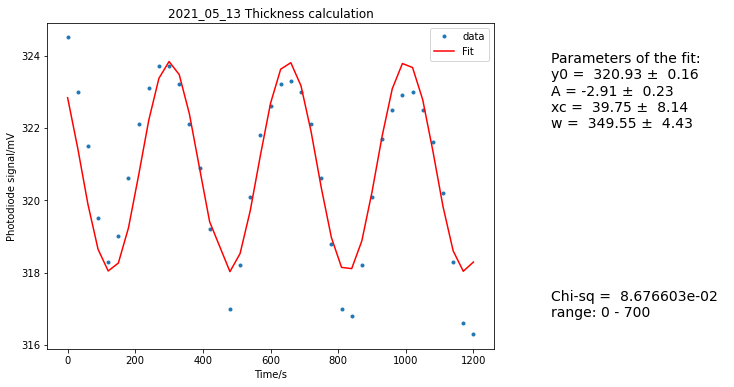

Chi-sq =  8.676603e-02 

Parameters of the fit:
y0 =  320.93 ±  0.16
A = -2.91 ±  0.23
xc =  39.75 ±  8.14
w =  349.55 ±  4.43



In [376]:
fig= plt.figure(figsize=(8,6))


t1 = str(f"Chi-sq = {chi_squared: 2e}  \n\
range: 0 - 700")




t2 = str(f"Parameters of the fit:\n\
y0 = {popt[0]: .2f} \u00B1 {perr[0]: .2f}\n\
A = {popt[1]: .2f} \u00B1 {perr[1]: .2f}\n\
xc = {popt[2]: .2f} \u00B1 {perr[2]: .2f}\n\
w = {popt[3]: .2f} \u00B1 {perr[3]: .2f}\n")

#plots:
plt.plot(x, y, '.', label='data' )
plt.plot(x, sinfit(x,*popt),'r-', label='Fit')
plt.title('{0} Thickness calculation'.format(date))
plt.xlabel('Time/s')
plt.ylabel(r'Photodiode signal/mV')
plt.legend()
plt.text(1, 0.2, t1, fontsize=14, transform=plt.gcf().transFigure)
plt.text(1, 0.6, t2, fontsize=14, transform=plt.gcf().transFigure)

plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/Thickness-calc_{}_2.png'.format(XP, date, date), bbox_inches="tight")


plt.show()

#print calculated chi suqared
t1 = print(f"Chi-sq = {chi_squared: 2e} \n")

#print parameters of the fit
t2 = print(f"Parameters of the fit:\n\
y0 = {popt[0]: .2f} \u00B1 {perr[0]: .2f}\n\
A = {popt[1]: .2f} \u00B1 {perr[1]: .2f}\n\
xc = {popt[2]: .2f} \u00B1 {perr[2]: .2f}\n\
w = {popt[3]: .2f} \u00B1 {perr[3]: .2f}\n")



# 3 Thickness Calculation

To calculate the film thickness we use the thin film interference equation:

$$d = \frac{\lambda_0}{2n_1 cos\theta_1}$$

where $\lambda_0$ is the wavelength of the laser in vacuum (632.8 nm), $n_1$ is the refractive index of the film and $\theta_1$ is the angle of reflection within the film (at the substrate/ice interface).

The refractive index of the film $n$ is estimated fromthe ratio of the maxima and the minima of the sinusoidal fit:

$$n = \frac{y_0 + A}{y_0 - A}$$

To obtain  $\theta_1$ we use Snell's law

$$n_1 sin\theta_1 = n_0 sin\theta_0$$

where $n_0 = 1$ in vacuum and $\theta_0$ is 20$^\circ$



In [377]:
#refractive index is given by n = (y0+A)/(y0-A)
n1=(popt[0]+popt[1])/(popt[0]-popt[1])

print (f"Refractive index of ice film, n1 = {n1: .2f} at 632.8 nm")

#n1*sin(theta1)=n0*sin(theta0), so theta1=arcsin(sin(20deg)/n1)
#!Attention, python numpy works in radians
theta0=np.radians(20)

theta1=np.arcsin(np.sin(theta0)/n1)
theta1_deg=np.rad2deg(theta1)

print (f"\ntheta1 = {theta1_deg: .2f} degrees")

#thickness per fringe, d = lambda(632.8)/2*n1*cos(theta1)
d=632.8/(2*n1*np.cos(theta1))

print (f"\nd = {d:.2f} nm per fringe")


Refractive index of ice film, n1 =  0.98 at 632.8 nm

theta1 =  20.38 degrees

d = 343.71 nm per fringe


Finally, to calculate the thickness:
$d$ gives the thickness per fringe and the period $w$ gives the time per fringe, so the rate given by thickness/time is (thickness/fringe)/(time/fringe) = $d/w$. 

In [378]:
#rate = (thickness/fringe) / (time/fringe)
rate=d/popt[3]

print (f"Deposition rate = {rate: .2f} nm/s")


Deposition rate =  0.98 nm/s


$\color{red}{\text{How to convert in ML/s}}$

To obtain the final thickness, multiply the rate (nm/s) by the total deposition time (s)

In [379]:
#enter deposition time, t in seconds
t= float(1200)

#calculate thickness, l in nm
thickness=rate*t

print (f"Ice film thickness, l = {thickness: .2f} nm")

Ice film thickness, l =  1179.95 nm


# 4 Data Export

In [380]:
Ice_thick_date = []

In [381]:
Ice_thick_date.append(
        
        {
            'Sample' : str(spl),
            'Date' : str(date),
            'n1' :  n1,
            'teta1' : theta1_deg,
            'd' : d,
            'rate' : rate,
            'thickness' : thickness,
            'Na' : "",
            'Nc' : "", 

            })

In [382]:
Ice_thick_date_df = pd.DataFrame(Ice_thick_date)

In [383]:
Ice_thick_date_df

,Sample,Date,n1,teta1,d,rate,thickness,Na,Nc
0,ASW,2021_05_13,0.982035,20.381966,343.707107,0.983288,1179.945506,,


In [384]:
Ice_thick_df = pd.read_csv('D:\DATA-Processing\PAC\Ice_thickness.csv')

In [385]:
XP_Date = []

XP_Date = str(Ice_thick_df['Date'])
print(XP_Date)

0    2020_09_15
1    2020_09_16
2    2020_09_17
3    2020_09_21
4    2020_09_28
5    2020_10_22
6    2020_11_16
7    2020_11_19
Name: Date, dtype: object


In [386]:
#if date in XP_Date:
    #    print("Not appended")
#else:
Ice_thick_date_df.to_csv('D:\DATA-Processing\PAC\Ice_thickness.csv', mode='a', header=False, index=False)

## Data Visualisation

In [387]:
Ice_thick_df

,Sample,Date,n1,teta1,d,rate,thickness,Na,Nc
0,ASW,2020_09_15,0.993048,20.146063,339.379075,0.755029,906.035346,4.810000e+17,5.590000e+17
1,ASW,2020_09_16,0.986981,20.275327,341.749008,0.896849,1076.218697,4.795654e+17,5.793533e+17
2,ASW,2020_09_17,1.013398,19.724534,331.677757,6.971830,836.619653,6.757415e+17,4.839162e+17
3,ASW,2020_09_21,1.012572,19.741297,331.983246,0.065403,784.835867,4.434018e+17,4.418921e+17
4,ASW,2020_09_28,1.011625,19.760549,332.334152,0.755904,907.084289,4.327905e+17,5.492510e+17
5,ASW,2020_10_22,1.185651,16.766143,278.705278,0.569413,683.295683,4.814449e+17,3.791857e+17
6,ASW,2020_11_16,0.969877,20.649048,348.623208,1.197077,1436.492762,4.843517e+17,4.927852e+17
7,ASW,2020_11_19,1.032910,19.336941,324.632254,1.064639,1341.444856,5.072321e+17,6.167617e+17


# Export Result in web-page

In [388]:
f = open("D:\DATA-Processing\PAC\{}/Samples/{}/{}_DP.html".format(XP,date,date),'a')



message = """<html>
<head></head>
<body>



<h1>Sample thickness </h1>

<figure>
<a href="Plots\DR\Thickness-calc_"""+str(date) + """_2.png" target="_blank"><image src="Plots\DR\Thickness-calc_"""+str(date) + """_2.png" width=""  Id=""  alt=""/></a>      
<figcaption></figcaption>
</figure>

<p>Output</p>





</body>
</html>"""




f.write(message)
f.close()